# Yolov8n-pose

Using Yolov8n to detect human poses.

### Constants

In [12]:
labels = {'standing': 0, 'takedown': 1, 'open_guard': 2, 'half_guard': 3, 'closed_guard': 4, '5050_guard': 5, 'side_control': 6, 'mount': 7, 'back': 8, 'turtle': 9}
body_parts = ["nose", "left eye", "right eye", "left ear", "right ear", "left shoulder", "right shoulder", "left elbow", "right elbow", "left wrist", "right wrist", "left hip", "right hip", "left knee", "right knee", "left ankle", "right ankle"]
num_labels = len(labels)
num_keypoints = 17
num_players = 2

connections = [
        ('nose', 'left eye'), ('left eye', 'left ear'), ('nose', 'right eye'), ('right eye', 'right ear'),
        ('nose', 'left shoulder'), ('left shoulder', 'left elbow'), ('left elbow', 'left wrist'),
        ('nose', 'right shoulder'), ('right shoulder', 'right elbow'), ('right elbow', 'right wrist'),
        ('left shoulder', 'left hip'), ('right shoulder', 'right hip'), ('left hip', 'right hip'),
        ('left hip', 'left knee'), ('right hip', 'right knee'), ('left knee', 'left ankle'), ('right knee', 'right ankle')
    ]

### Importing Coco model

In [13]:
from ultralytics import YOLO

# Load a model

# Options:
# yolov8n-pose.pt
# yolov8s-pose.pt
# yolov8m-pose.pt
# yolov8l-pose.pt
# yolov8x-pose.pt
# yolov8x-pose-p6.pt

model_version = 'yolov8x-pose.pt'

pose_model = YOLO('../assets/coco_model/' + model_version)

### Utils functions

#### Libraries

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#### Get keypoints from image using Yolov8n

In [15]:
def get_keypoints(image_path):
    predictions = pose_model(image_path)[0]
    
    if len(predictions) == 0:
        return None
    
    keypoints = predictions[0].keypoints
    keypoints_tensor = keypoints.data
    keypoints = keypoints_tensor.numpy()
    
    if len(predictions) > 1:
        keypoints2 = predictions[1].keypoints
        keypoints_tensor2 = keypoints2.data
        keypoints2 = keypoints_tensor2.numpy()
    else:
        keypoints2 = np.array([[[0, 0, 0]] * num_keypoints])
    
    keypoints = np.concatenate((keypoints, keypoints2), axis=0)
    
    return keypoints

#### Draw keypoints on image

In [16]:
def draw_image_with_keypoints(image_path, keypoints):
    image = cv.imread(image_path)
    
    colors = [(0, 0, 255), (255, 0, 0)]
    c = 0

    for keypoint_set in keypoints:
        for i in range(num_keypoints):
            x = int(keypoint_set[i][0])
            y = int(keypoint_set[i][1])
            cv.circle(image, (x, y), 3, colors[c], -1)  
            
        for connection in connections:
            part_a = body_parts.index(connection[0])
            part_b = body_parts.index(connection[1])

            if keypoint_set[part_a][2] > 0.5 and keypoint_set[part_b][2] > 0.5:
                x1 = int(keypoint_set[part_a][0])
                y1 = int(keypoint_set[part_a][1])
                x2 = int(keypoint_set[part_b][0])
                y2 = int(keypoint_set[part_b][1])
                cv.line(image, (x1, y1), (x2, y2), colors[c], 2)
                
        c += 1
        
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()

### Usage

In [17]:
def yolo_keypoints(image_path, show_image=False):
    keypoints = get_keypoints(image_path)
    
    if show_image:
        draw_image_with_keypoints(image_path, keypoints)


image 1/1 D:\jiu_dataset\images\0904408.jpg: 384x640 2 persons, 539.5ms
Speed: 2.0ms preprocess, 539.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


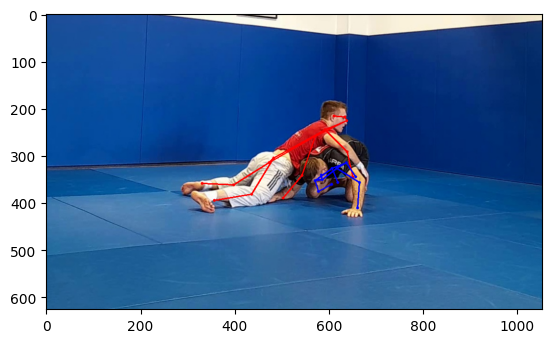

In [18]:
yolo_keypoints("D:\\jiu_dataset\\images\\0904408.jpg", show_image=True)